MODEL BUILDING!💯

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cleaned_hospital_Readm_v2.csv')

In [3]:
df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,THOMAS HOSPITAL,10100,AL,Chronic_Obstructive_Pulmonary,166,0.9502,18.4,19.3,27,01-JUL-11,30-JUN-14
1,THOMAS HOSPITAL,10100,AL,Heart_Failure,343,0.9587,19.9,20.8,66,01-JUL-11,30-JUN-14
2,THOMAS HOSPITAL,10100,AL,Hip_Knee_Surgery,641,1.0221,4.9,4.8,32,01-JUL-11,30-JUN-14
3,J PAUL JONES HOSPITAL,10102,AL,Chronic_Obstructive_Pulmonary,157,0.9756,16.6,16.7,23,01-JUL-11,30-JUN-14
4,GRANDVIEW MEDICAL CENTER,10104,AL,Chronic_Obstructive_Pulmonary,239,1.0373,21.5,20.7,54,01-JUL-11,30-JUN-14


In [4]:
df['Excess Readmission Ratio'].min()

0.5442

In [5]:
df['Excess Readmission Ratio'].max()

1.826

In [6]:
df.describe()

,Provider Number,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,16585.000000,16585.000000,16585.000000,16585.000000,16585.000000,16585.000000
mean,263262.641242,291.550317,0.997076,16.385662,16.369466,47.721435
std,160656.934173,268.686542,0.081131,5.426473,5.257213,48.894859
min,10001.000000,28.000000,0.544200,2.500000,3.200000,11.000000
25%,110146.000000,157.000000,0.963100,15.700000,16.000000,23.000000
50%,250138.000000,157.000000,0.975600,16.600000,16.700000,23.000000
75%,390130.000000,351.000000,1.035900,19.700000,19.900000,56.000000
max,670099.000000,7248.000000,1.826000,33.500000,28.200000,875.000000


In [7]:
#dropping some columns data wont be useful for the model building.
df.drop(['Hospital Name','Provider Number','State','Start Date','End Date'], axis= 1 , inplace=True )

In [8]:
df.head(10)

,Measure Name,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
0,Chronic_Obstructive_Pulmonary,166,0.9502,18.4,19.3,27
1,Heart_Failure,343,0.9587,19.9,20.8,66
2,Hip_Knee_Surgery,641,1.0221,4.9,4.8,32
3,Chronic_Obstructive_Pulmonary,157,0.9756,16.6,16.7,23
4,Chronic_Obstructive_Pulmonary,239,1.0373,21.5,20.7,54
5,Heart_Failure,170,1.1144,22.8,20.4,45
6,Pneumonia,192,1.0563,17.9,16.9,38
7,Chronic_Obstructive_Pulmonary,157,0.9435,15.8,16.8,23
8,Chronic_Obstructive_Pulmonary,75,1.0167,17.2,16.9,14
9,Chronic_Obstructive_Pulmonary,134,1.0513,19.8,18.8,30


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16585 entries, 0 to 16584
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Measure Name                16585 non-null  object 
 1   Number of Discharges        16585 non-null  int64  
 2   Excess Readmission Ratio    16585 non-null  float64
 3   Predicted Readmission Rate  16585 non-null  float64
 4   Expected Readmission Rate   16585 non-null  float64
 5   Number of Readmissions      16585 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 777.6+ KB


In [10]:
#using label Encoder for assign a numerical value to the measure name as it's an impportant part of our model.

le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [11]:
df.head(10)

,Measure Name,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
0,1,166,0.9502,18.4,19.3,27
1,2,343,0.9587,19.9,20.8,66
2,3,641,1.0221,4.9,4.8,32
3,1,157,0.9756,16.6,16.7,23
4,1,239,1.0373,21.5,20.7,54
5,2,170,1.1144,22.8,20.4,45
6,4,192,1.0563,17.9,16.9,38
7,1,157,0.9435,15.8,16.8,23
8,1,75,1.0167,17.2,16.9,14
9,1,134,1.0513,19.8,18.8,30


In [12]:
#lets standardize our data into small sizes so as to get a better model run

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_scaled.head(10)

,Measure Name,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
0,-0.707107,-0.467288,-0.577808,0.371217,0.557448,-0.423809
1,0.000000,0.191492,-0.473035,0.647648,0.842779,0.373845
2,0.707107,1.300624,0.308445,-2.116662,-2.200751,-0.321545
3,-0.707107,-0.500786,-0.264722,0.039500,0.062874,-0.505619
4,-0.707107,-0.195588,0.495803,0.942508,0.823757,0.128413
5,0.000000,-0.452401,1.446152,1.182081,0.766690,-0.055661
6,1.414214,-0.370518,0.730001,0.279073,0.100918,-0.198829
7,-0.707107,-0.500786,-0.660393,-0.107930,0.081896,-0.505619
8,-0.707107,-0.805983,0.241884,0.150072,0.100918,-0.689693
9,-0.707107,-0.586390,0.668370,0.629219,0.462337,-0.362451


In [13]:
df.isna().sum()

Measure Name                  0
Number of Discharges          0
Excess Readmission Ratio      0
Predicted Readmission Rate    0
Expected Readmission Rate     0
Number of Readmissions        0
dtype: int64

In [14]:
#data is ready for some model building 
#we will use a logistic Regression model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df_scaled.drop('Excess Readmission Ratio', axis=1)
y = df_scaled['Excess Readmission Ratio']


In [15]:
#noticed the target variable is continuous so we neeed to convert it.
bins = [0,1,float('inf')]
labels =['low','high']
y_bined = pd.cut(y, bins=bins, labels=labels, include_lowest=True)

In [16]:
y_bined=y_bined.fillna('low')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y_bined, test_size=0.3, random_state=100)

In [18]:
#fitting the model to the training data
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [19]:
prediction = log.predict(X_test)

In [20]:
print(prediction)

['low' 'high' 'low' ... 'low' 'low' 'low']


In [21]:
#Evaluating our model.

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))

[[ 540   72]
 [   0 4364]]
              precision    recall  f1-score   support

        high       1.00      0.88      0.94       612
         low       0.98      1.00      0.99      4364

    accuracy                           0.99      4976
   macro avg       0.99      0.94      0.96      4976
weighted avg       0.99      0.99      0.99      4976

0.9855305466237942


In [22]:
from sklearn.model_selection import GridSearchCV
para_grid =  {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear','lbfgs']

}

In [23]:
grid_search = GridSearchCV(log,para_grid ,cv=5,scoring= 'accuracy')

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [24]:
best_model = grid_search.best_estimator_

In [25]:
best_model
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test,prediction)
print("Accuracy:", accuracy)
print('Best parameter:',grid_search.best_params_)

print(confusion_matrix(y_test, predictions))



Accuracy: 0.9855305466237942
Best parameter: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
[[ 599   13]
 [   8 4356]]


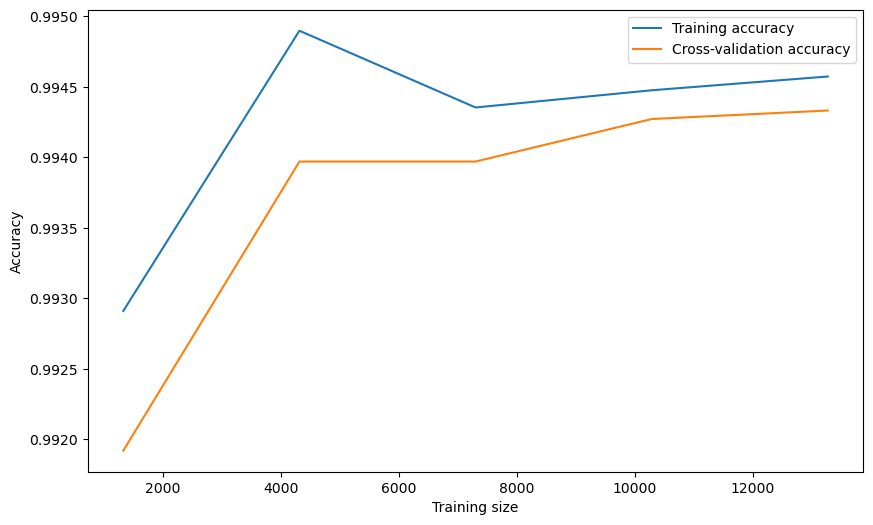

In [26]:
#lets check the learnin curve 

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_model, X, y_bined, cv=5, scoring='accuracy', n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training accuracy')

plt.plot(train_sizes, test_scores_mean, label='Cross-validation accuracy')

plt.xlabel('Training size')

plt.ylabel('Accuracy')

plt.legend(loc='best')

plt.show()

In [27]:
#let's test our model on a new data

new_data = pd.DataFrame({
    'Measure Name': [1],
    'Number of Discharges': [500],
    'Predicted Readmission Rate': [1.12],
    'Expected Readmission Rate':[20.4],
    'Number of Readmissions': [1000]
})

new_data_scaled = pd.DataFrame(scaler.fit_transform(new_data), columns=new_data.columns)

predictions = best_model.predict(new_data_scaled)

predictions


array(['low'], dtype=object)

In [28]:
#let's save our model 
import pickle 

In [29]:


with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
    print('Model saved successfully.')

Model saved successfully.


In [30]:
#lets save the scaled and Label Encoder

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
    print('Scaler saved successfully.')

with open('le.pkl', 'wb') as file:
    pickle.dump(le, file)
    print('Label Encoder saved successfully.')

Scaler saved successfully.
Label Encoder saved successfully.
